In [168]:
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from functions_josh import *

In [2]:
# Load dataframe
df = pd.read_csv('shows_imdb_rt.csv', index_col=0)

In [3]:
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,rt_audience_rating,genres,tv_rating,release_year,runtime_mins,imdb_url
0,La Casa de Papel,Netflix,8.5,215007,91.0,82.0,"['action', 'crime', 'mystery', 'thriller']",TV-MA,2017.0,70.0,https://www.imdb.com/title/tt6468322/
1,Ozark,Netflix,8.4,136710,81.0,91.0,"['crime', 'drama', 'thriller']",TV-MA,2017.0,60.0,https://www.imdb.com/title/tt5071412/
2,Tiger King,Netflix,7.8,33700,86.0,86.0,"['documentary', 'crime']",TV-MA,2020.0,31.0,https://www.imdb.com/title/tt11823076/
3,Westworld,HBO,8.7,388252,85.0,80.0,"['drama', 'mystery', 'sci-fi', 'western']",TV-MA,2016.0,62.0,https://www.imdb.com/title/tt0475784/
4,The Walking Dead,AMC,8.2,821809,81.0,78.0,"['drama', 'horror', 'thriller']",TV-MA,2010.0,44.0,https://www.imdb.com/title/tt1520211/


In [4]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               247 non-null    object 
 1   network             247 non-null    object 
 2   imdb_rating         247 non-null    float64
 3   num_imdb_ratings    247 non-null    int64  
 4   rt_critic_rating    247 non-null    float64
 5   rt_audience_rating  194 non-null    float64
 6   genres              247 non-null    object 
 7   tv_rating           247 non-null    object 
 8   release_year        247 non-null    float64
 9   runtime_mins        247 non-null    float64
 10  imdb_url            247 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.2+ KB


In [5]:
# Drop column with null values, knowing we can grab it later if necessary
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    float64
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    float64
 8   runtime_mins      247 non-null    float64
 9   imdb_url          247 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 21.2+ KB


In [6]:
# Change dtypes for columns without null values
df[['rt_critic_rating', 'release_year', 'runtime_mins']] = df[['rt_critic_rating', 'release_year', 'runtime_mins']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    int64  
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    int64  
 8   runtime_mins      247 non-null    int64  
 9   imdb_url          247 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.2+ KB


In [7]:
# Notice that genres are lists trapped inside a string
df.iloc[1]['genres']

"['crime', 'drama', 'thriller']"

In [8]:
# De-stringify the genres list scraped from IMDB
df['genres'] = df.genres.apply(lambda x: ast.literal_eval(x))
df.iloc[1]['genres']

['crime', 'drama', 'thriller']

In [9]:
# Make a dataframe of dummy genre colums to get a count of each genre
df_genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_genres

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
243,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
244,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
245,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Merge dummies dataframe onto original dataframe
df = pd.concat([df, df_genres], axis=1)
# Take a peek
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
4,The Walking Dead,AMC,8.2,821809,81,"[drama, horror, thriller]",TV-MA,2010,44,https://www.imdb.com/title/tt1520211/,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Remove outliers for the crucial numerical data

# Calculate the z-scores of the numerical data
z_scores = stats.zscore(df[['imdb_rating', 'num_imdb_ratings', 'rt_critic_rating', 'release_year']])
# Turn those scores into all positive values, so we can easily separate
abs_z_scores = np.abs(z_scores)
# Filter out outliers (more than 3 standard deviations from the mean)
filtered_entries = (abs_z_scores < 3).all(axis=1)
# Update the dataframe
df = df[filtered_entries]

In [12]:
# See that 16 rows were eliminated
df.shape

(231, 36)

In [13]:
# Save a copy for good measure :P
df.to_csv('shows_imdb_rt_updated.csv')

In [14]:
# Set up a parameter to include only contemporary shows (released in the last decade)
df_contemp = df[df['release_year'] >= 2010]
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Get a list of column names, so we can create a dataframe with just the genre data
df_contemp.columns

Index(['title', 'network', 'imdb_rating', 'num_imdb_ratings',
       'rt_critic_rating', 'genres', 'tv_rating', 'release_year',
       'runtime_mins', 'imdb_url', 'action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'],
      dtype='object')

In [16]:
# Create dataframe of contemporary genre data
genres_contemp = df_contemp[
    ['action', 'adventure', 'animation',
       'biography', 'comedy', 'crime', 'documentary', 'drama', 'family',
       'fantasy', 'game-show', 'history', 'horror', 'music', 'musical',
       'mystery', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western']
    ]
genres_contemp.head()

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Look at sums of shows within each genre
genres_contemp.sum()

action         31
adventure      21
animation      15
biography       6
comedy         35
crime          47
documentary    14
drama          97
family          4
fantasy        20
game-show       0
history        10
horror         11
music           2
musical         1
mystery        32
news            1
reality-tv      2
romance        10
sci-fi         27
short           1
sport           3
talk-show       3
thriller       42
war             3
western         2
dtype: int64

In [18]:
# 136 shows over 26 genres (shows can have more than 1 genre)
genres_contemp.shape

(136, 26)

In [19]:
# Eliminate genres with small samples
genres_contemp = genres_contemp[genres_contemp.columns[genres_contemp.sum() >= 10]]

In [20]:
# still 136 shows, now over the 14 most common genres
genres_contemp.shape

(136, 14)

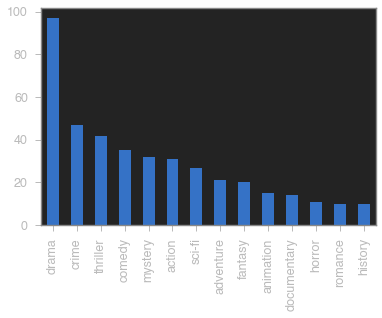

In [21]:
# quick look at most common genres
genres_contemp.sum().sort_values(ascending=False).plot.bar()

In [22]:
# Set up some variables to show the average ratings and popularity by genre
# Do this by multiplying the ratings and # of ratings by the dummy values in the genre columns
genres_contemp_imdb_rating = genres_contemp.apply(lambda x: x*df_contemp['imdb_rating'])
genres_contemp_rt_rating = genres_contemp.apply(lambda x: x*df_contemp['rt_critic_rating'])
genres_contemp_popularity = genres_contemp.apply(lambda x: x*df_contemp['num_imdb_ratings'])

In [23]:
# Capture the average of each parameter per genre
genre_imdb_avg = genres_contemp_imdb_rating.sum()/genres_contemp.sum()
genre_rt_avg = genres_contemp_rt_rating.sum()/genres_contemp.sum()
genre_pop_avg = genres_contemp_popularity.sum()/genres_contemp.sum()

In [138]:
genres_contemp_rt_rating

,action,adventure,animation,comedy,crime,documentary,drama,fantasy,history,horror,mystery,romance,sci-fi,thriller
0,91,0,0,0,91,0,0,0,0,0,91,0,0,91
1,0,0,0,0,81,0,81,0,0,0,0,0,0,81
2,0,0,0,0,86,86,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,85,0,0,0,85,0,85,0
6,0,0,0,0,97,0,97,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0,0,0,0,98,0,98,0,0,0,0,0,0,0
239,100,0,0,0,0,0,100,0,100,0,0,0,0,0
241,0,0,0,100,0,0,100,0,0,100,0,0,0,0
245,0,0,0,0,93,0,93,0,0,0,0,0,0,0


In [137]:
df1 = genre_rt_avg.to_frame()
df1.columns = 'avg_rt_rating'

TypeError: Index(...) must be called with a collection of some kind, 'avg_rt_rating' was passed

In [135]:
df2 = genre_pop_avg.to_frame()
df4 = genre_imdb_avg.to_frame()

In [157]:
df3 = pd.concat([genre_rt_avg, genre_imdb_avg, genre_pop_avg], axis=1)

In [158]:
df3.columns = ['rt_avg', 'imdb_avg', 'pop_avg']

In [206]:
df3 = df3.sort_values('pop_avg')

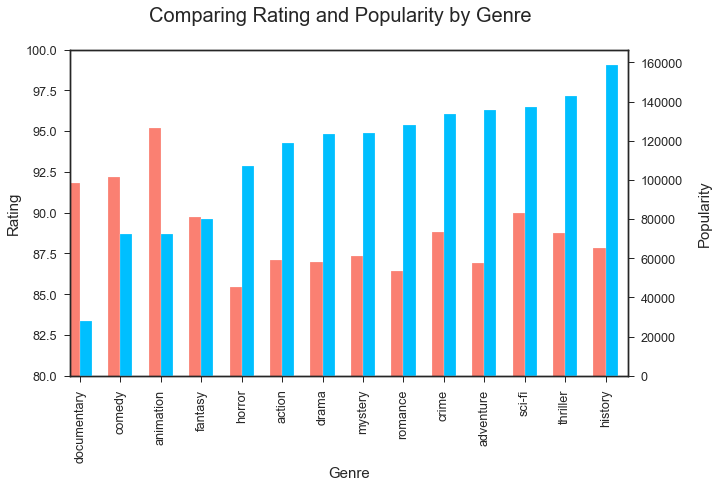

In [229]:
sns.set_style("ticks")
fig = plt.figure(figsize=(10,6)) # Create matplotlib figure
plt.suptitle('Comparing Rating and Popularity by Genre', fontsize = 20)
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
# plt.legend(['Rating', 'Popularity'], loc = 1)
width = 0.3

df3.rt_avg.plot(kind='bar', color='salmon', ax=ax, width=width, position=1)
df3.pop_avg.plot(kind='bar', color='deepskyblue', ax=ax2, width=width, position=0)

ax.set_xlabel('Genre', fontsize=15)
ax.set_ylim(80,100)
ax.set_ylabel('Rating', fontsize=15)
ax2.set_ylabel('Popularity', fontsize=15, labelpad=15.0)
plt.show()

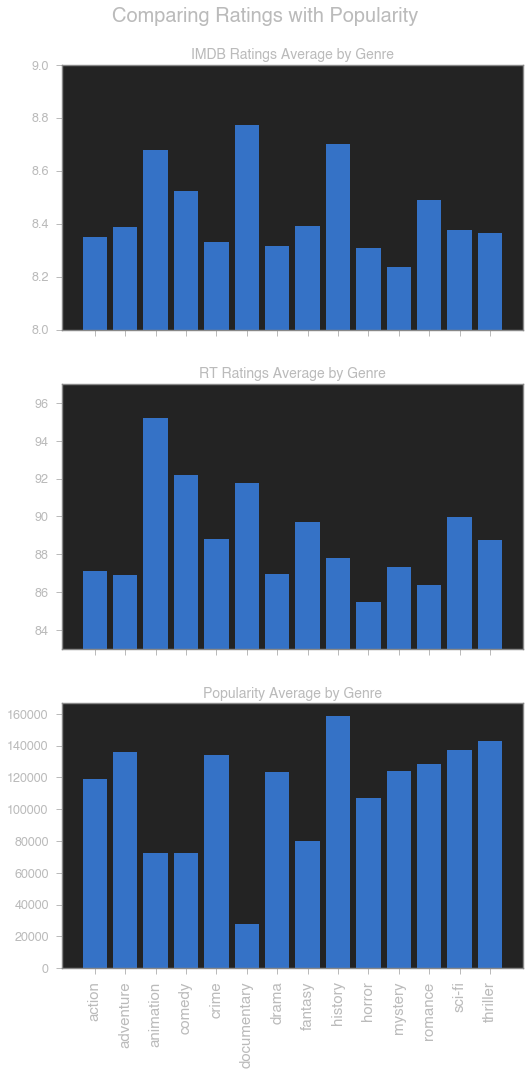

In [24]:
# Take a look at the relationship between popularity and ratings
x = genres_contemp.columns
y1 = genre_imdb_avg
y2 = genre_rt_avg
y3 = genre_pop_avg

fig, axs = plt.subplots(3,sharex=True,figsize=(8,15))
fig.suptitle('Comparing Ratings with Popularity', fontsize=20, y=1.01)

axs[0].bar(x,y1)
axs[0].set_ylim([8.0,9.0])
axs[0].set_title('IMDB Ratings Average by Genre', fontsize=14)

axs[1].bar(x,y2)
axs[1].set_ylim([83,97])
axs[1].set_title('RT Ratings Average by Genre', fontsize=14)

axs[2].bar(x,y3)
axs[2].set_title('Popularity Average by Genre', fontsize=14)

plt.xticks(rotation='vertical', fontsize=15)
fig.tight_layout(pad=3.0)

In [25]:
# Correlation = -0.4877942302531624
genre_pop_avg.corr(genre_imdb_avg)

-0.4877942302531624

In [217]:
# Correlation = -0.6446794882910207
genre_pop_avg.corr(genre_rt_avg)

-0.6446794882910207

In [27]:
# Success of a show should be measured by number of ratings.

In [28]:
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [32]:
conditions = [
    (df_contemp['network'].str.find('BBC') >= 0),
    (df_contemp['network'].str.find('Amazon') >= 0),
    (df_contemp['network'].str.find('Hulu') >= 0),
    (df_contemp['network'].str.find('NBC') >= 0),
    (df_contemp['network'].str.find('Acorn') >= 0),
    (df_contemp['network'].str.find('Cartoon Network') >= 0),
    (df_contemp['network'].str.find('Netflix') >= 0),
    (df_contemp['network'].str.find('Disney') >= 0)
]

choices = [
    'BBC',
    'Amazon',
    'Hulu',
    'NBC',
    'Acorn',
    'Cartoon Network',
    'Netflix',
    'Disney'
]

df_contemp['network'] = np.select(conditions, choices, default=df_contemp['network'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df_contemp.groupby('network')['num_imdb_ratings'].sum()/df_contemp['network'].value_counts()

ABC                 61027.000000
AMC                280536.000000
AT-X                37748.000000
Acorn               18120.500000
Amazon              49572.500000
Aniplex              8864.000000
Apple TV+            1430.000000
BBC                 52983.500000
CBS                 47271.500000
CW                 180467.800000
Cartoon Network    102299.000000
Channel 5           15792.000000
Cinemax             41494.000000
Comedy Central      16218.000000
Crunchyroll         34009.500000
Disney             108021.000000
FX                 121341.142857
HBO                162752.384615
History            383867.000000
Hulu                42499.714286
NBC                 86102.555556
NGC                  5502.000000
Netflix            125023.228571
PBS                 61923.666667
POP                 30569.000000
SVT                 53646.000000
Science             16324.000000
Showtime           240984.000000
Starz              147775.666667
SyFy                19577.000000
TruTV     

In [40]:
df_contemp['network'].value_counts()

Netflix            35
HBO                13
NBC                 9
Amazon              8
Hulu                7
FX                  7
BBC                 6
Cartoon Network     6
CW                  5
USA                 3
PBS                 3
Starz               3
ABC                 3
CBS                 2
Crunchyroll         2
Disney              2
Showtime            2
Acorn               2
AT-X                1
Channel 5           1
Aniplex             1
WEB TV US           1
AMC                 1
Apple TV+           1
YouTube Premium     1
SyFy                1
History             1
Cinemax             1
Comedy Central      1
NGC                 1
ZDF                 1
TruTV               1
SVT                 1
Science             1
POP                 1
louisck.net         1
Name: network, dtype: int64

In [58]:
top_networks = ['Netflix', 'HBO', 'NBC', 'Amazon', 'Hulu', 'FX', 'BBC', 'Cartoon Network', 'CW']
top_networks_values = df_contemp[df_contemp['network'].isin(top_networks)]['network'].value_counts()

Netflix            35
HBO                13
NBC                 9
Amazon              8
Hulu                7
FX                  7
Cartoon Network     6
BBC                 6
CW                  5
Name: network, dtype: int64

In [55]:
df_contemp[df_contemp['network'].isin([3, 6])['Netflix', 'HBO']]

ValueError: Lengths must match to compare

In [46]:
df_contemp['network'].value_counts() >= 5

Netflix             True
HBO                 True
NBC                 True
Amazon              True
Hulu                True
FX                  True
BBC                 True
Cartoon Network     True
CW                  True
USA                False
PBS                False
Starz              False
ABC                False
CBS                False
Crunchyroll        False
Disney             False
Showtime           False
Acorn              False
AT-X               False
Channel 5          False
Aniplex            False
WEB TV US          False
AMC                False
Apple TV+          False
YouTube Premium    False
SyFy               False
History            False
Cinemax            False
Comedy Central     False
NGC                False
ZDF                False
TruTV              False
SVT                False
Science            False
POP                False
louisck.net        False
Name: network, dtype: bool

In [ ]:
df_contemp.groupby(['network'].v)

In [42]:
# genres_contemp = genres_contemp[genres_contemp.columns[genres_contemp.sum() >= 10]]
networks_contemp = df_contemp['network']
networks_contemp = networks_contemp[networks_contemp.value_counts() >=5]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [84]:
df_contemp.iloc[130:140]

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
235,The Knick,Cinemax,8.4,41494,92,"[drama, history]",TV-MA,2014,58,https://www.imdb.com/title/tt2937900/,...,0,0,0,0,0,0,0,0,0,0
237,Wentworth,Channel 5,8.4,15792,98,"[crime, drama]",TV-MA,2013,45,https://www.imdb.com/title/tt2433738/,...,0,0,0,0,0,0,0,0,0,0
239,Generation War,ZDF,8.4,23639,100,"[action, drama, history, war]",TV-MA,2013,14,https://www.imdb.com/title/tt1883092/,...,0,0,0,0,0,0,0,0,1,0
241,Inside No. 9,BBC,8.4,10718,100,"[comedy, drama, horror]",TV-MA,2014,30,https://www.imdb.com/title/tt2674806/,...,0,0,0,0,0,0,0,0,0,0
245,American Crime Story,FX,8.4,74208,93,"[biography, crime, drama]",TV-MA,2016,42,https://www.imdb.com/title/tt2788432/,...,0,0,0,0,0,0,0,0,0,0
246,Delhi Crime,Netflix,8.4,8273,92,"[crime, drama]",unrated,2019,50,https://www.imdb.com/title/tt9398466/,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_contemp['original'] = [
 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
 1, 0, 1, 1, 0, 1 ]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
df_contemp.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western,original
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,1,0,0,1
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,1,0,0,1
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,1,0,0,0,0,0,1,0
6,Better Call Saul,AMC,8.7,280536,97,"[crime, drama]",TV-MA,2015,46,https://www.imdb.com/title/tt3032476/,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df_contemp_adapt = df_contemp[df_contemp['original'] == 0]
df_contemp_orig = df_contemp[df_contemp['original'] == 1]

In [94]:
len(df_contemp_adapt)

77

In [106]:
len(df_contemp_orig)

59

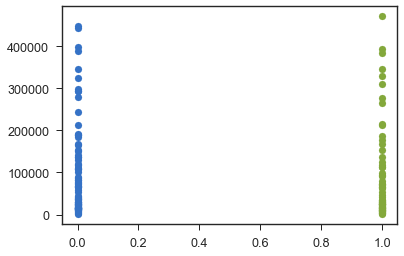

In [216]:
plt.scatter(df_contemp_adapt['original'], df_contemp_adapt['num_imdb_ratings'])
plt.scatter(df_contemp_orig['original'], df_contemp_orig['num_imdb_ratings'])

(80000.0, 110000.0)

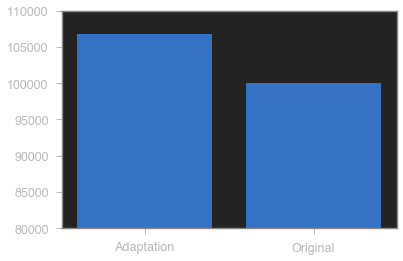

In [102]:
adapt_avg = df_contemp_adapt['num_imdb_ratings'].sum()/len(df_contemp_adapt)
orig_avg = df_contemp_orig['num_imdb_ratings'].sum()/len(df_contemp_orig)
plt.bar(['Adaptation', 'Original'], [adapt_avg, orig_avg])
plt.ylim(80000,110000)

(7.0, 10.0)

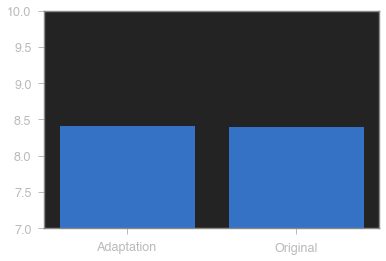

In [103]:
adapt_imdb_avg = df_contemp_adapt['imdb_rating'].sum()/len(df_contemp_adapt)
orig_imdb_avg = df_contemp_orig['imdb_rating'].sum()/len(df_contemp_orig)
plt.bar(['Adaptation', 'Original'], [adapt_imdb_avg, orig_imdb_avg])
plt.ylim(7.0, 10.0)

(70.0, 100.0)

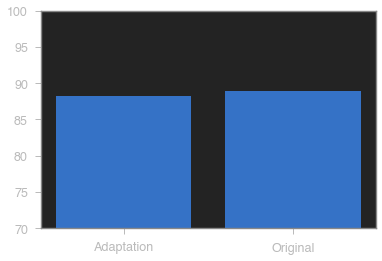

In [105]:
adapt_rt_avg = df_contemp_adapt['rt_critic_rating'].sum()/len(df_contemp_adapt)
orig_rt_avg = df_contemp_orig['rt_critic_rating'].sum()/len(df_contemp_orig)
plt.bar(['Adaptation', 'Original'], [adapt_rt_avg, orig_rt_avg])
plt.ylim(70, 100)

In [ ]:
df_smoke_by_state_pct.unstack().plot(kind='bar', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='horizontal')
plt.title('Smoking Status', fontsize=15, pad=10)
plt.xlabel('State', labelpad=15)
plt.ylabel('% of observations', labelpad=10)

In [133]:
top_networks_contemp.groupby(['network','release_year'])['title'].count().unstack().plot(kind='bar', stacked=True, legend=False)

NameError: name 'top_networks_contemp' is not defined

In [129]:
df_contemp.groupby(['network','release_year'])['title'].count()[50:70]

network  release_year
HBO      2020            1
History  2013            1
Hulu     2015            1
         2016            1
         2017            2
         2019            1
         2020            2
NBC      2012            1
         2013            3
         2014            1
         2016            1
         2018            2
         2020            1
NGC      2018            1
Netflix  2011            1
         2013            2
         2014            1
         2015            5
         2016            2
         2017            6
Name: title, dtype: int64